*Messing with Intuition: A Review of Basic Probability Concepts*

![](image.webp)

You might think it's a total waste of time to revisit probability theory and its laws. The problem that follows was presented by Amos Tversky and Daniel Kahneman to illustrate how people violate the principles of probability when making intuitive judgments.

Linda is 31 years old, single, outspoken, and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in anti-nuclear demonstrations. Which is more probable?

1. Linda is a bank teller.
2. Linda is a bank teller and is active in the feminist movement.


# Probability

A probability is a fraction of a finite set. 

In [1]:
survey = 1000

bank_tellers = 20

prob_bank_teller = bank_tellers / survey

print(f'The prob of being a bank teller is: {prob_bank_teller:.4f}')

The prob of being a bank teller is: 0.0200


If we choose at random (every person has the same chance of being chosen), the probability they are a bank teller is 2%.

In [2]:
# Download the file with the data

from os.path import basename, exists

def download(url):
    filename = basename(url) # extract the name from the url
    if not exists(filename): # check if the file is in the local directory
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename) # download the file from the url
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkBayes2/raw/master/data/gss_bayes.csv')

In [3]:
import pandas as pd

gss = pd.read_csv('gss_bayes.csv')
gss.head()

,caseid,year,age,sex,polviews,partyid,indus10
0,1,1974,21.0,1,4.0,2.0,4970.0
1,2,1974,41.0,1,5.0,0.0,9160.0
2,5,1974,58.0,2,6.0,1.0,2670.0
3,6,1974,30.0,1,5.0,4.0,6870.0
4,7,1974,48.0,1,5.0,4.0,7860.0


The columns are:

* `caseid`: Respondent identifier.

* `year`: Year when the respondent was surveyed.

* `age`: Respondent's age when surveyed.

* `sex`: Male or female.

* `polviews`: Political views on a range from liberal to conservative.

* `partyid`: Political party affiliation, Democrat, Independent, or Republican.

* `indus10`: [Code](https://www.census.gov/cgi-bin/sssd/naics/naicsrch?chart=2007) for the industry the respondent works in.

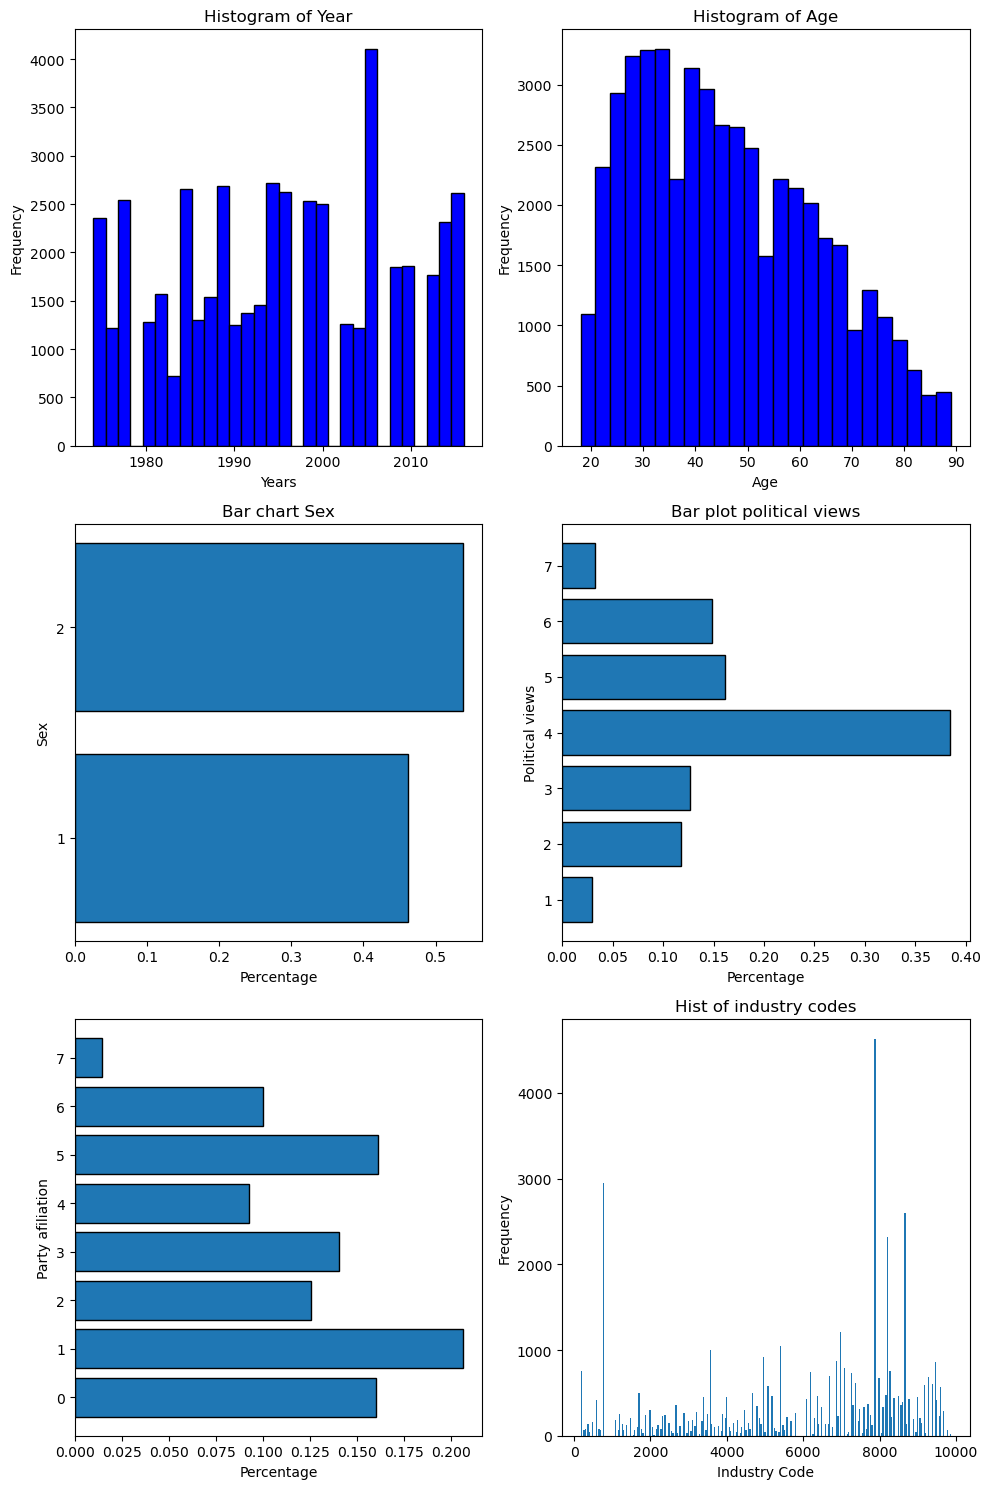

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10,15))

# Year
axs[0,0].hist(gss.year, bins=30, color='blue', edgecolor='black')
axs[0,0].set_title('Histogram of Year')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Frequency')

# Age
axs[0,1].hist(gss.age, bins=25, color='blue', edgecolor='black')
axs[0,1].set_title('Histogram of Age')
axs[0,1].set_xlabel('Age')
axs[0,1].set_ylabel('Frequency')

# sex
sex_valcount = gss.sex.value_counts(normalize=True)
axs[1,0].barh(sex_valcount.index, sex_valcount.values, edgecolor='black')
axs[1,0].set_yticks(sex_valcount.index)
axs[1,0].set_title('Bar chart Sex')
axs[1,0].set_ylabel('Sex')
axs[1,0].set_xlabel('Percentage')

# polviews
pol_valcount = gss.polviews.value_counts(normalize=True)
axs[1,1].barh(pol_valcount.index, pol_valcount.values, edgecolor='black')
axs[1,1].set_yticks(pol_valcount.index)
axs[1,1].set_title('Bar plot political views')
axs[1,1].set_ylabel('Political views')
axs[1,1].set_xlabel('Percentage')

# partyid
party_valcount = gss.partyid.value_counts(normalize=True)
axs[2,0].barh(party_valcount.index, party_valcount.values, edgecolor='black')
axs[2,0].set_yticks(party_valcount.index)
axs[2,0].set_ylabel('Party afiliation')
axs[2,0].set_xlabel('Percentage')

# indus10
axs[2,1].hist(gss.indus10, bins=gss.indus10.nunique())
axs[2,1].set_title('Hist of industry codes')
axs[2,1].set_ylabel('Frequency')
axs[2,1].set_xlabel('Industry Code')

plt.tight_layout()
plt.show()

The code for "Banking and related activities" is `6870`

In [5]:
banker = (gss.indus10 == 6870)

In [6]:
gss[banker].head()

,caseid,year,age,sex,polviews,partyid,indus10
3,6,1974,30.0,1,5.0,4.0,6870.0
33,44,1974,54.0,2,4.0,1.0,6870.0
45,56,1974,59.0,1,5.0,0.0,6870.0
91,118,1974,28.0,2,4.0,1.0,6870.0
106,135,1974,30.0,2,4.0,2.0,6870.0


In [7]:
print(f"There're {banker.sum()} banker in the dataset, which is {banker.mean()*100:.2f}% of the data")

There're 728 banker in the dataset, which is 1.48% of the data


Let's create a probability function that takes a boolen serie and return probabilities as a fraction of a finite set.

In [8]:
def prob(A):
    return A.mean()

In [9]:
# prob banker
prob(banker)

0.014769730168391155

In [10]:
# prob female (2)
female = (gss.sex == 2)
prob(female)

0.5378575776019476

The encoding of `polviews` is:

```
1. Extremely liberal
2. Liberal
3. Slightly liberal
4. Moderate
5. Slightly conservative
6. Conservative
7. Extremely conservative
```

The encoding of `partyid` is:
```
0. Strong democrat
1. Not strong democrat
2. Independent, near democrat
3. Independent
4. Independent, near republican
5. Not strong republican
6. Strong republican
7. Other party
```

In [11]:
# Prob extreme liberal
altliberal = gss.polviews == 1
prob(altliberal)

0.02925542706431325

In [12]:
map_polviews = {
    1:"Extremely liberal",
    2:"Liberal",
    3:"Slightly liberal",
    4:"Moderate",
    5:"Slightly conservative",
    6:"Conservative",
    7:"Extremely conservative"
}
unique_cat = gss.polviews.nunique()
for i in range(1, unique_cat+1):
    mask = gss.polviews == i
    print(f"The prob of being '{map_polviews[i]}' is {prob(mask)*100:.3f}%")    

The prob of being 'Extremely liberal' is 2.926%
The prob of being 'Liberal' is 11.783%
The prob of being 'Slightly liberal' is 12.666%
The prob of being 'Moderate' is 38.432%
The prob of being 'Slightly conservative' is 16.109%
The prob of being 'Conservative' is 14.849%
The prob of being 'Extremely conservative' is 3.236%


In [13]:
map_partyid = {
    0:"Strong democrat",
    1:"Not strong democrat", 
    2:"Independent, near democrat",
    3:"Independent",
    4:"Independent, near republican",
    5:"Not strong republican",
    6:"Strong republican",
    7:"Other party"
}
for i in range(len(map_partyid)):
    mask = gss.partyid == i 
    print(f"The prob of being a '{map_partyid[i]}' is {prob(mask)*100:.3f}")



The prob of being a 'Strong democrat' is 15.995
The prob of being a 'Not strong democrat' is 20.631
The prob of being a 'Independent, near democrat' is 12.532
The prob of being a 'Independent' is 14.058
The prob of being a 'Independent, near republican' is 9.255
The prob of being a 'Not strong republican' is 16.101
The prob of being a 'Strong republican' is 10.000
The prob of being a 'Other party' is 1.428


## Conjunction

Conjunction is just another name for the logical operation `and`, which is the probability of the two events both ocurring. It's also referred as joint probability -> $P(A\cap B) = P(A|B) P(B)$ "product rule". 

In [14]:
# Prob of being banker and extreme liberal
prob(banker & altliberal)

0.00022316899979711908

Quite low!

In [15]:
# Prob of being banker and strong republican
stRep = gss.partyid == 6
prob(banker & stRep)

0.0018259281801582471

Higher if you are strong Republican 😃

## Conditional

Conditional probability is a probability that depends on a condition (conditional probability distribution).

$$P(A|B) = P(A\cap B) / P(B)$$

What is the probability that a respondent is a Democrat, given that they are liberal?

In [16]:
democrat = gss.partyid <=1
liberal = gss.polviews <=3
prob(democrat[liberal])


0.5206403320240125

A bit more of 50% liberals are democrats.

What is the probability that a respondent is female, given that they are banker?

In [17]:
prob(female[banker])

0.7706043956043956

77% of the banker are females.

In [18]:
def conditional(proposition, given):
    return prob(proposition[given])

In [19]:
conditional(female, banker)

0.7706043956043956

As conjunction was commutative (A&B == B&A), conditional probability is not. 

`conditional(A,B) != conditional(B,A)`

In [20]:
conditional(female,given=banker), conditional(banker, given=female)

(0.7706043956043956, 0.02116102749801969)

77% of the bankers are female, only about 2% of female respondents are bankers

In [21]:
male = gss.sex == 1
conditional(male, banker), conditional(banker, male)

(0.22939560439560439, 0.007331313929496466)

23% of the bankers are males, and 0.7% of the males are banker.

We can also combine conditional probability with conjuction.

What is the probability a respondent is female, given that they are a liberal and Democrat? 


In [22]:
prob(female[liberal & democrat])

0.576085409252669

We can say that above 57% of all liberals and Democrats are female. 

# The Laws of Probability

We can derive three relationship between conjunction and conditional probability.

## Theorem 1

$$P(A|B) = \frac{P(A~\mathrm{and}~B)}{P(B)}$$

For example if we want to know the fraction of banker that are female, $P(\text{female} \mid \text{banker})$, we can use the conditional probability function as we did before.

In [23]:
conditional(female, given=banker)

0.7706043956043956

The operation as we've seen before is:

In [24]:
female[banker].mean()

0.7706043956043956

We could also compute the probability of being female and banker, and divided by the probability of being banker

In [25]:
(female & banker).mean() / banker.mean()

0.7706043956043956

The result is the same. 

## Theorem 2

From the theorem 1, we can compute a conjunction by the product of two probabilities. 

$$P(A~\mathrm{and}~B) = P(B) P(A|B)$$

In [26]:
# Conjunction of female and banker by the product of two probabilities
banker.mean() * female[banker].mean()

0.011381618989653074

In [27]:
# Conjuction of female and banker
(female & banker).mean()

0.011381618989653074

In [28]:
# Same using our functions
prob(banker) * conditional(female, given=banker) 

0.011381618989653074

## Theorem 3

As we've already seen, conjunction is commutative but conditional is not. This means that $P(A~\mathrm{and}~B) = P(B~\mathrm{and}~A)$. 

If we apply the theorem 2 in both sides:
$$P(A~\mathrm{and}~B) = P(B) P(A|B)$$

$$P(B~\mathrm{and}~A) = P(A) P(B|A)$$

$$P(B) P(A|B) = P(A) P(B|A)$$

So if we divide by $P(B)$, we get the theorem 3 that is the Bayes's theorem:
$$P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

In [29]:
(female.mean() * banker[female].mean()) / banker.mean()

0.7706043956043955

In [30]:
prob(female) * conditional(banker, given=female) / prob(banker)

0.7706043956043955

## The Law of Total Probability

In addition to the three theorems, there's also the law of total probability:

The total probability of A is the sum of two probabilities: $$P(A) = P(B_1~\mathrm{and}~A) + P(B_2~\mathrm{and}A)$$

Only if $B_1$ and $B_2$ are:
1. Mutually exclusive (they can't occur at the same time)
2. Collectively exhaustive (at least one of the events must occur)

In [31]:
# prob of a banker
prob(banker)

0.014769730168391155

In [32]:
# Total probability of a banker
prob(male & banker) + prob(female & banker)

0.014769730168391155

Because `male`and `female` are mutually exclusive and colectively exhaustive (MECE), we get the same result we got by computing the probability of banker directly. 

Applying the theorem 2 to the total probability law:
$$P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2)$$

In [33]:
prob(male) * conditional(banker, male) + prob(female) * conditional(banker, female)

0.014769730168391153

When there're more than two conditions, we can write the total probability law as:
$$P(A) = \sum_i P(B_i) P(A|B_i)$$
Remember this holds as long as $B_i$ are mutually exclusive and collectively exhaustive.

In [34]:
gss.polviews.value_counts(normalize=True).sort_index()

polviews
1.0    0.029255
2.0    0.117833
3.0    0.126659
4.0    0.384317
5.0    0.161087
6.0    0.148489
7.0    0.032360
Name: proportion, dtype: float64

In [35]:
# Probability of a banker using the total probability law
sum=0 
for i in range(1, 8):
    sum += prob(gss.polviews==i) * conditional(banker, gss.polviews==i)
print(sum)

0.014769730168391157


# Exercises

* What is the probability that a respondent is liberal, given that they are a Democrat?

* What is the probability that a respondent is a Democrat, given that they are liberal?

In [36]:
conditional(liberal, given=democrat)

0.3891320002215698

In [37]:
liberal[democrat].mean()

0.3891320002215698

In [38]:
conditional(democrat, given=liberal)

0.5206403320240125

In [39]:
democrat[liberal].mean()

0.5206403320240125

> Linda is 31 years old, single, outspoken, and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in anti-nuclear demonstrations.  Which is more probable?
> 1. Linda is a banker.
> 2. Linda is a banker and considers herself a liberal Democrat.

To answer this question, compute 

* The probability that Linda is a banker, given that she is female,

* The probability that Linda is a banker and a liberal Democrat, given that she is female.

In [40]:
conditional(banker, given=female)

0.02116102749801969

In [41]:
banker[female].mean()

0.02116102749801969

In [42]:
conditional(banker & liberal & democrat, given=female)

0.0023009316887329786

There's a [famous quote](https://quoteinvestigator.com/2014/02/24/heart-head/) about young people, old people, liberals, and conservatives that goes something like:

> If you are not a liberal at 25, you have no heart. If you are not a conservative at 35, you have no brain.

Whether you agree with this proposition or not, it suggests some probabilities we can compute as an exercise.
Rather than use the specific ages 25 and 35, let's define `young` and `old` as under 30 or over 65:

In [43]:
young = gss.age < 30
old = gss.age >= 65
prob(young), prob(old)

(0.19435991073240008, 0.17328058429701765)

In [44]:
conservative = gss.polviews >= 5
prob(conservative)

0.3419354838709677

* What is the probability that a randomly chosen respondent is a young liberal?

* What is the probability that a young person is liberal?

* What fraction of respondents are old conservatives?

* What fraction of conservatives are old?

In [45]:
# prob young and liberal
prob(young & liberal)

0.06579427875836884

In [46]:
# prob liberal given young
conditional(liberal, given=young)

0.338517745302714

In [47]:
# old and conservative
prob(old & conservative)

0.06701156421180766

In [48]:
# prob old given conservative
conditional(old, given=conservative)

0.19597721609113564

# Conclusion

At this point, if you encounter a similar Linda problem, you know that the probability of two events occurring together cannot be more probable than the occurrence of either event alone.

In order to establish a strong foundation, we reviewed the concepts of probability, conjunction, conditional probability, and the fundamental laws that underpin Bayes's theorem.

It's also a good practical example of how powerful Pandas is for filtering data.

I guess you are ready for this:

>Bill is 34 years old. He is intelligent, but unimaginative, compulsive and generally lifeless. In school, he was strong in mathematics but weak in social studies and humanities.

Which statement is more probable:

1. Bill is an accountant that plays jazz for a hobby, or
2. Bill plays jazz for a hobby?

 


At this point, if you encounter a similar Linda problem, you know that the probability of two events occurring together cannot be more probable than the occurrence of either event alone.

In order to establish a strong foundation, we reviewed the concepts of probability, conjunction, conditional probability, and the fundamental laws that underpin Bayes's theorem.

It's also a good practical example of how powerful Pandas is for filtering data.

I guess you are ready for this:

# Resources

Most of the content of the notebook is based on the chapter about probability of the book "Think Bayes 2" written by Allen Downey. You can access the book [here](https://allendowney.github.io/ThinkBayes2/chap01.html).

The Bill problem have been taken from this [site](https://eecs.qmul.ac.uk/~norman/bbns_old/Details/subjective_prob.html).